# Theory/Computation Problems

### Problem 1 (20 points) 
Show that the stationary point (zero gradient) of the function
$$
\begin{aligned}
    f=2x_{1}^{2} - 4x_1 x_2+ 1.5x^{2}_{2}+ x_2
\end{aligned}
$$
is a saddle (with indefinite Hessian). Find the directions of downslopes away from the saddle. Hint: Use Taylor's expansion at the saddle point. Find directions that reduce $f$.

![q1p1](HW2img/q1p1.png)
![q1p2](HW2img/q1p2.png)

### Problem 2 (50 points) 

* (10 points) Find the point in the plane $x_1+2x_2+3x_3=1$ in $\mathbb{R}^3$ that is nearest to the point $(-1,0,1)^T$. Is this a convex problem? Hint: Convert the problem into an unconstrained problem using $x_1+2x_2+3x_3=1$.

* (40 points) Implement the gradient descent and Newton's algorithm for solving the problem. Attach your codes along with a short summary including (1) the initial points tested, (2) corresponding solutions, (3) a log-linear convergence plot.

![q2](HW2img/q2.png)

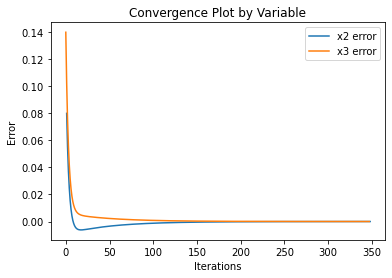

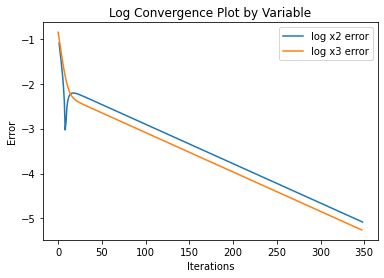

In [11]:
import numpy as np
from matplotlib import pyplot as plt

obj = lambda x: (5*x[0]**2+12*x[0]*x[1]-8*x[0]+10*x[1]**2-14*x[1]+5) #x[0] is x2 x[1] is x3
def grad(x):
    return [10*x[0]+12*x[1]-8, 12*x[0]+20*x[1]-14]

eps = 1e-3  # termination criterion
x0 = [0., 0.]  # initial guess
k = 0  # counter
soln = [x0]  # use an array to store the search steps
x = soln[k]  # start with the initial guess
error = np.linalg.norm(grad(x)) 
a = 0.01  # set a fixed step size to start with

while error >= eps:  # keep searching while gradient norm is larger than eps
    x = np.array(x) - a*np.array(grad(x))
    soln.append(x)
    error = np.linalg.norm(grad(x))
    
#print(soln)  # print the search trajectory

error2_c1 = np.asarray([]) #x2 error
error2_c2 = np.asarray([]) #x3 error

for i in range(1, np.size(soln,0)):
    converge_error = np.array(soln[i]) - np.array(soln[i-1])
    error2_c1 = np.append(error2_c1, converge_error[0]) #x2 error
    error2_c2 = np.append(error2_c2, converge_error[1]) #x3 error
    
error2 = np.column_stack((error2_c1,error2_c2))

iterations = list(range(1,np.size(soln,0))) #just used for x axis on plot

#print(error2) #Print error for checking
    
plt.title("Convergence Plot by Variable")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.plot(iterations,error2_c1,error2_c2)
plt.legend(["x2 error", "x3 error"], loc = "upper right")
plt.show()

    
plt.title("Log Convergence Plot by Variable")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.plot(iterations,np.log10(np.absolute(error2_c1)),np.log10(np.absolute(error2_c2)))
plt.legend(["log x2 error", "log x3 error"], loc = "upper right")
plt.show()


### Problem 3 (10 points) 
Let $f(x)$ and $g(x)$ be two convex functions defined on the convex set $\mathcal{X}$. 
* (5 points) Prove that $af(x)+bg(x)$ is convex for $a>0$ and $b>0$. 
* (5 points) In what conditions will $f(g(x))$ be convex?

![q3](HW2img/q3.png)

### Problem 4 (bonus 10 points)
Show that $f({\bf x}_1) \geq f(\textbf{x}_0) + 
    \textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)$ for a convex function $f(\textbf{x}): \mathcal{X} \rightarrow \mathbb{R}$ and for $\textbf{x}_0$, $\textbf{x}_1 \in \mathcal{X}$. 

![q4](HW2img/q4.png)

# Design Problems

### Problem 5 (20 points) 
Consider an illumination problem: There are $n$ lamps and $m$ mirrors fixed to the ground. The target reflection intensity level is $I_t$. The actual reflection intensity level on the $k$th mirror can be computed as $\textbf{a}_k^T \textbf{p}$, where $\textbf{a}_k$ is given by the distances between all lamps to the mirror, and $\textbf{p}:=[p_1,...,p_n]^T$ are the power output of the lamps. The objective is to keep the actual intensity levels as close to the target as possible by tuning the power output $\textbf{p}$.

* (5 points) Formulate this problem as an optimization problem. 
* (5 points) Is your problem convex?
* (5 points) If we require the overall power output of any of the $n$ lamps to be less than $p^*$, will the problem have a unique solution?
* (5 points) If we require no more than half of the lamps to be switched on, will the problem have a unique solution?

![q5p1](HW2img/q5p1.png)
![q5p2](HW2img/q5p2.png)

# Note

For this homework, you may want to attach sketches as means to explain your ideas. Here is how you can attach images.

![everly1](img/everly7.jpg)